<a href="https://colab.research.google.com/github/ljw-0108/bio-data-analysis/blob/main/%EC%8B%AC%EC%9E%A5%EC%A7%88%ED%99%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 임포트 & 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 이미 Drive 마운트가 완료된 상태라고 가정
df = pd.read_csv('/content/drive/MyDrive/md/heart.csv')  # 실제 경로로 수정
print("데이터셋 크기:", df.shape)
display(df.head())


데이터셋 크기: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



■ 결측치 개수
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

■ HeartDisease 분포 (0=정상, 1=질환)
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

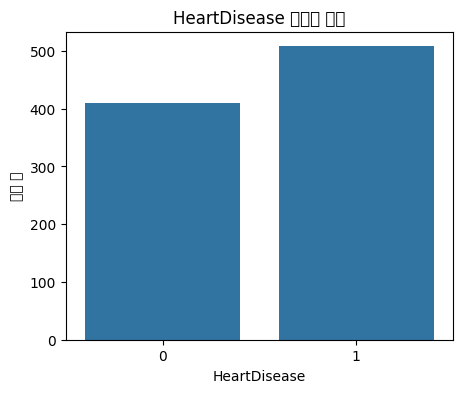

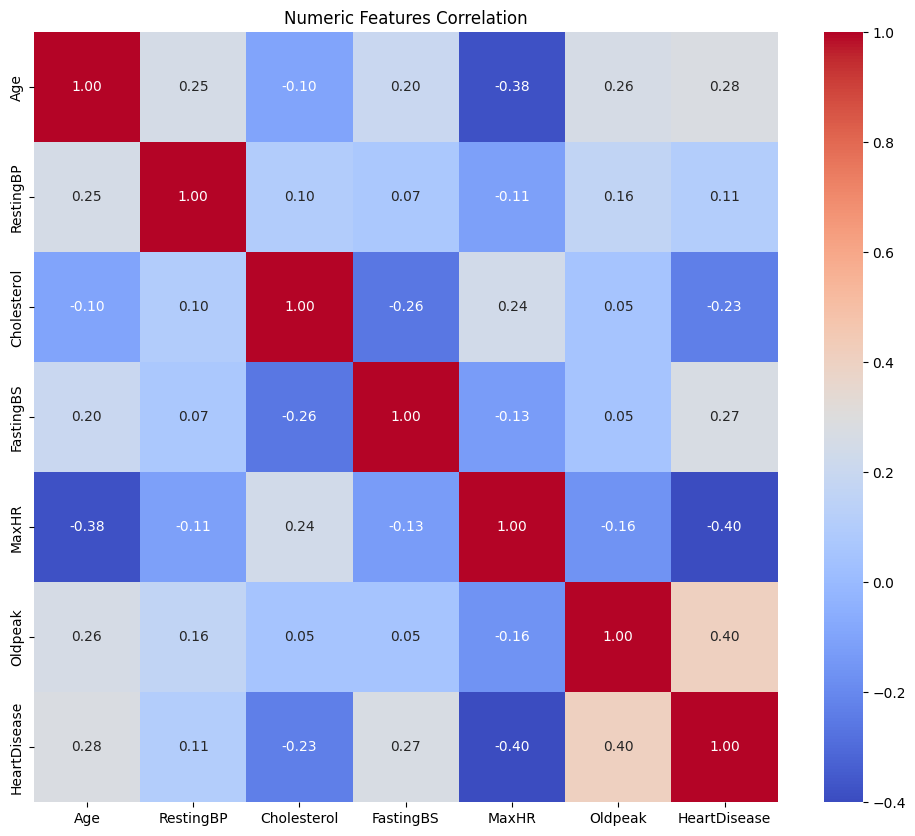

In [2]:
# 데이터 탐색 (EDA)
df.info()
display(df.describe())

# 결측치 확인
print("\n■ 결측치 개수")
print(df.isnull().sum())

# 타깃 분포
target_col = 'HeartDisease'
print(f"\n■ {target_col} 분포 (0=정상, 1=질환)")
print(df[target_col].value_counts(normalize=True))

plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=df)
plt.title(f'{target_col} 클래스 분포')
plt.xlabel(target_col)
plt.ylabel('샘플 수')
plt.show()

# 수치형 피처 상관관계 히트맵
plt.figure(figsize=(12,10))
num_cols = df.select_dtypes(include=['int64','float64']).columns
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric Features Correlation')
plt.show()


In [3]:
# 전처리 파이프라인 구축
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 4-1) 피처/타깃 분리
X = df.drop(target_col, axis=1)
y = df[target_col]

# 4-2) 숫자형 / 범주형 컬럼 구분
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# 4-3) 학습/검증 분할 (CV 전용이므로, 여기서는 Train/Test로 나누어 두고
#     교차검증은 전체 X,y 기반으로 수행하거나 train만으로 수행 가능합니다.)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4-4) 전처리 파이프라인 정의
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


Numeric cols: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical cols: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [4]:
# 머신러닝 모델링 + k‐fold 교차검증

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

# (1) 로지스틱 회귀 파이프라인 정의
pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# --- 5‐Fold CV (전체 데이터 X,y 사용) ---
# cv = 5, scoring = 'roc_auc'
scores_lr = cross_val_score(pipe_lr, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"LogisticRegression 5-Fold CV AUC: {scores_lr.mean():.3f}  (std: {scores_lr.std():.3f})")

# (2) 랜덤 포레스트 파이프라인 정의
pipe_rf = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# --- 5‐Fold CV (전체 데이터 X,y 사용) ---
scores_rf = cross_val_score(pipe_rf, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"RandomForest      5-Fold CV AUC: {scores_rf.mean():.3f}  (std: {scores_rf.std():.3f})")

# (3) 최종 학습하고 검증셋에 평가 (CV 이후)
pipe_lr.fit(X_train, y_train)
proba_lr = pipe_lr.predict_proba(X_val)[:,1]
print("\nLogisticRegression Test-Set AUC:", roc_auc_score(y_val, proba_lr))

pipe_rf.fit(X_train, y_train)
proba_rf = pipe_rf.predict_proba(X_val)[:,1]
print("RandomForest      Test-Set AUC:", roc_auc_score(y_val, proba_rf))

# (4) 랜덤 포레스트 상세 리포트
pred_rf = pipe_rf.predict(X_val)
print("\n■ RandomForest Classification Report")
print(classification_report(y_val, pred_rf))


LogisticRegression 5-Fold CV AUC: 0.909  (std: 0.033)
RandomForest      5-Fold CV AUC: 0.911  (std: 0.037)

LogisticRegression Test-Set AUC: 0.9299378287900525
RandomForest      Test-Set AUC: 0.9318507890961263

■ RandomForest Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [5]:
# 하이퍼파라미터 튜닝 (GridSearchCV 예시)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth':    [None, 5, 10]
}
gs = GridSearchCV(
    Pipeline([('pre', preprocessor),
              ('clf', RandomForestClassifier(random_state=42))]),
    param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best CV AUC:", gs.best_score_)


Best params: {'clf__max_depth': 5, 'clf__n_estimators': 100}
Best CV AUC: 0.9287678115320391


In [6]:
# 딥러닝 모델링 (Keras)

import tensorflow as tf
from tensorflow.keras import layers, models

# 전처리 후 NumPy 배열 변환
X_train_np = preprocessor.fit_transform(X_train)
X_val_np   = preprocessor.transform(X_val)

# 모델 정의
dl_model = models.Sequential([
    layers.Input(shape=(X_train_np.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)
dl_model.summary()

# 학습
history = dl_model.fit(
    X_train_np, y_train,
    validation_data=(X_val_np, y_val),
    epochs=30, batch_size=32
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - auc: 0.6328 - loss: 0.6665 - val_auc: 0.9088 - val_loss: 0.5393
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.8443 - loss: 0.5602 - val_auc: 0.9267 - val_loss: 0.4263
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8853 - loss: 0.4458 - val_auc: 0.9315 - val_loss: 0.3592
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9034 - loss: 0.4051 - val_auc: 0.9315 - val_loss: 0.3354
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9112 - loss: 0.3776 - val_auc: 0.9342 - val_loss: 0.3201
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9321 - loss: 0.3358 - val_auc: 0.9366 - val_loss: 0.3119
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9213 - loss: 0.3528 - val_auc: 0.9361 - val_loss: 0.3114
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.9295 - loss: 0.3315 - val_auc: 0.9381 - val_loss: 0.3080
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9113 - loss

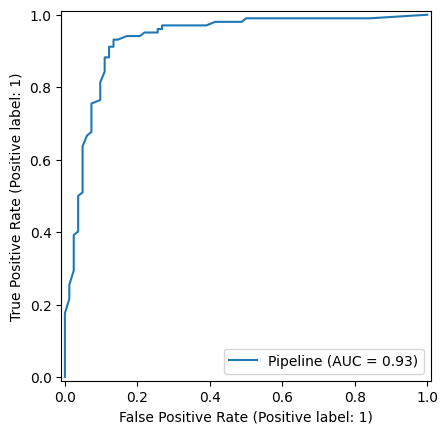

DL Model AUC: 0.943


In [7]:
# 모델 평가 및 시각화

from sklearn.metrics import RocCurveDisplay

# (1) ML 모델 ROC (RandomForest)
RocCurveDisplay.from_estimator(pipe_rf, X_val, y_val)
plt.show()

# (2) DL 모델 AUC
loss, auc = dl_model.evaluate(X_val_np, y_val, verbose=0)
print(f"DL Model AUC: {auc:.3f}")




---

### 주요 컬럼(피처) 설명

| 컬럼 이름          | 설명                                                                                 | 예시 값 (의미)                      |
|--------------------|--------------------------------------------------------------------------------------|-------------------------------------|
| `Age`              | 환자의 나이 (단위: 세)                                                               | 63 (63세)                           |
| `Sex`              | 환자의 성별 (0 = 여성, 1 = 남성)                                                      | 0 또는 1                            |
| `ChestPainType`    | 흉통(가슴 통증) 유형 (4가지 범주형)                                                   | `TA` (역행협심증 판정 등)           |
| `RestingBP`        | 안정 시 혈압 (단위: mm Hg)                                                            | 145 (mm Hg)                         |
| `Cholesterol`      | 혈중 콜레스테롤 수치 (단위: mg/dL)                                                    | 233 (mg/dL)                         |
| `FastingBS`        | 공복 혈당(혈당 검사 시 공복 여부) (0 = 정상, 1 = 당뇨병 의심)                           | 1 (당뇨병 의심)                     |
| `RestingECG`       | 안정 시 심전도 검사 결과 (범주형)                                                     | `Normal`, `ST` 등                  |
| `MaxHR`            | 최대 심박수 (운동 검사 시 최대 박동)                                                  | 150 (bpm)                           |
| `ExerciseAngina`   | 운동 시 협심증(가슴 통증) 발생 여부 (0 = 없음, 1 = 있음)                              | 0 또는 1                            |
| `Oldpeak`          | 운동 후 혈압 변화량 (ST 분절 하강 정도, 단위: mm)                                     | 2.3 (mm)                            |
| `ST_Slope`         | 운동 중 ST 분절(심전도 파형) 기울기 정보 (범주형)                                     | `Up`, `Flat`, `Down`                |
| `HeartDisease`     | **타깃(정답) 컬럼**: 심장질환 유무 (0 = 정상, 1 = 질환)                                | 0 또는 1                            |

> **요약**:  
> - 총 14개의 컬럼 중 마지막 `HeartDisease`가 “질환 발생 여부(정답)” 역할을 합니다.  
> - 나머지 13개 컬럼은 환자의 나이, 성별, 혈압, 콜레스테롤 수치, 심전도 정보 등 **입력 데이터(피처)**입니다.

---

##  데이터가 담고 있는 의미

1. **나이(Age)**  
   - 보통 나이가 많을수록 심혈관질환 위험이 높아집니다.

2. **성별(Sex)**  
   - 남성과 여성의 심장질환 발생률이 차이가 날 수 있으므로 범주형(0/1)으로 구분합니다.

3. **흉통 유형(ChestPainType)**  
   - 환자가 느끼는 통증의 종류를 `TA`, `ATA`, `NAP`, `ASY` 등 4가지로 분류하여, 통증 패턴이 심장질환과 연관이 있는지를 모델이 학습할 수 있도록 합니다.

4. **안정 시 혈압(RestingBP)**  
   - 혈압이 높을수록 심혈관계에 부담이 커집니다.

5. **콜레스테롤(Cholesterol)**  
   - 혈중 콜레스테롤 수치도 심장질환 위험도를 알려주는 중요한 지표입니다.

6. **공복 혈당(FastingBS)**  
   - 당뇨병 여부를 추정할 수 있는 값으로, 당뇨병이 있으면 심장질환 위험이 더 높아질 수 있습니다.

7. **심전도(RestECG)**, **최대 심박수(MaxHR)**, **운동 중 협심증 발생(ExerciseAngina)**, **운동 후 ST 기울기(ST_Slope)** 등  
   - 모두 심장 상태를 반영하는 지표들로, 비정상적인 심전도 파형이나 운동 후 변화가 심장질환과 연관이 있습니다.


- **“AUC(Area Under Curve)”란 무엇인가요?**  
  - AUC는 “Receiver Operating Characteristic (ROC) Curve” 아래 면적을 뜻합니다.  
  - 0.5에 가까우면 전혀 구분하지 못하는 모델, 1.0에 가까우면 완벽히 구분하는 모델입니다.  
  - 일반적으로 0.9 이상이면 “잘 작동하는 모델”로 볼 수 있습니다.

- **왜 여러 가지 모델(로지스틱 회귀, 랜덤 포레스트, 딥러닝)을 사용하나요?**  
  - 서로 다른 알고리즘이 데이터의 특성을 이해하는 방식이 달라서,  
  - **복합적으로 비교** 해 보고 최적의 방법을 선택하기 위해 다양한 모델을 시도합니다.

- **k-fold 교차검증은 왜 하나요?**  
  - 학습 데이터와 테스트 데이터를 5등분(폴드) 하는데,  
  - 5가지 결과(AUC)를 평균 내면,  
  - 한 번의 데이터 분할만으로 얻어지는 결과보다 더 **일반화된 성능 추정치**를 얻을 수 있습니다.

---
